In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold

In [29]:
plik = arff.loadarff("dataset_24_mushroom.arff")
dane = pd.DataFrame(plik[0])
dane.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [30]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [31]:
for i in dane.columns:
    print(i)
    z = np.unique(dane[i])
    print(z) 
    print(len(z))
    if(len(z) <= 1) : 
        print("Empty column or with one unique value.")

cap-shape
[b'b' b'c' b'f' b'k' b's' b'x']
6
cap-surface
[b'f' b'g' b's' b'y']
4
cap-color
[b'b' b'c' b'e' b'g' b'n' b'p' b'r' b'u' b'w' b'y']
10
bruises%3F
[b'f' b't']
2
odor
[b'a' b'c' b'f' b'l' b'm' b'n' b'p' b's' b'y']
9
gill-attachment
[b'a' b'f']
2
gill-spacing
[b'c' b'w']
2
gill-size
[b'b' b'n']
2
gill-color
[b'b' b'e' b'g' b'h' b'k' b'n' b'o' b'p' b'r' b'u' b'w' b'y']
12
stalk-shape
[b'e' b't']
2
stalk-root
[b'?' b'b' b'c' b'e' b'r']
5
stalk-surface-above-ring
[b'f' b'k' b's' b'y']
4
stalk-surface-below-ring
[b'f' b'k' b's' b'y']
4
stalk-color-above-ring
[b'b' b'c' b'e' b'g' b'n' b'o' b'p' b'w' b'y']
9
stalk-color-below-ring
[b'b' b'c' b'e' b'g' b'n' b'o' b'p' b'w' b'y']
9
veil-type
[b'p']
1
Empty column or with one unique value.
veil-color
[b'n' b'o' b'w' b'y']
4
ring-number
[b'n' b'o' b't']
3
ring-type
[b'e' b'f' b'l' b'n' b'p']
5
spore-print-color
[b'b' b'h' b'k' b'n' b'o' b'r' b'u' b'w' b'y']
9
population
[b'a' b'c' b'n' b's' b'v' b'y']
6
habitat
[b'd' b'g' b'l' b'm' b'p' b'

In [32]:

type(dane.loc[1, 'class'])

bytes

### Dataset Description
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility (combined with poisonous). The Guide clearly states that there is no simple rule for determining the edibility of a mushroom.

The dataset appears to be complete with no null values, though the stalk-root attribute contains a "missing" code indicating unknown information. However, in this specific situation, I will treat it as a distinct category. There are slightly over 8,000 entries and 23 columns: 22 categorical attributes and one binary class. All are stored as Python bytes objects. 

[Website which is the source of this data](https://openml.org/search?type=data&sort=runs&id=24&status=active).

A table of variable descriptions can be found in the README.

---

### Method Description

The goal of this project is to build a functioning ML pipeline to train and test a Linear Discriminant Analysis (LDA) model on this dataset. However, I have noticed a fundamental issue. LDA relies on two key assumptions about classes:

1.  The data for each class k is drawn from a **Multivariate Gaussian distribution** with mean vector $\mu_k$ and covariance matrix $\Sigma_k$.
2.  All classes share the same **covariance matrix** $\Sigma$ (i.e., $\Sigma_1 = \Sigma_2 = ... = \Sigma$).

In this dataset however, all data is categorical, meaning it follows a discrete probability distribution rather than a Gaussian one.

One approach to this problem is using **dummy variables**(one-hot encoding). This works on a simple principle of assigning each categorical value a number. For example if `gill_size` has the values "broad" and "narrow," I can convert them into two new binary variables: `is_broad` (1 if broad, 0 if not) and similarly for `is_narrow`.

This presents two issues:
* LDA will treat these as variables from a Gaussian distribution that only take values 0 and 1, which does not compare well to theory.
* The variables are perfectly collinear (if we know one, we know the other).To resolve this, I must drop one variable to create a baseline, though this introduces an arbitrary ordering to the data which is less than ideal.

If the dataset contained only a few categorical variables alongside continuous ones, LDA would likely perform decently, the method is usually robust enough to handle slight deviations. However, this dataset represents an extreme case where **all** features are categorical. Strictly speaking LDA is not the right tool for the job.

Thankfully the focus of this project is not on the model's practical utility or high accuracy. I will proceed with LDA using dummy variables to observe the results.

---

### Preprocessing and Cleaning



In [33]:
dane.drop(columns=['veil-type'], inplace=True) #only one unique value, does not add information

#Checking class balance
dane["class"].value_counts("normalize=True")


class
b'e'    0.517971
b'p'    0.482029
Name: proportion, dtype: float64

The classes are almost perfectly balanced

In [34]:
X = dane.drop(columns=['class'])
y= dane['class']

X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.shape)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=78, stratify=y_encoded)



(8124, 95)


In [35]:
value = 0.99 * (1 - 0.99) 

selector = VarianceThreshold(threshold=value)

X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

mask = selector.get_support()

X_train_clean = pd.DataFrame(X_train_reduced, columns=X_train.columns[mask], index=X_train.index)
X_test_clean = pd.DataFrame(X_test_reduced, columns=X_test.columns[mask], index=X_test.index)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count:  {X_train_clean.shape[1]}")

X_train = X_train_clean
X_test = X_test_clean

Original feature count: 95
Reduced feature count:  74


### Feature Enginering 
I decided to hold off on creating new interaction features. Since one-hot encoding already increased the column count from 22 to nearly 100(which I sipmlified to 74), the model has enough data complexity to work with. Adding more features could increase the chance of overfitting. Another bonus is that keeping the features simple makes the final model's coefficients much easier to interpret.

---

### Model Optimization

LDA has relatively few hyperparameters to tune. The primary focus is testing different **solvers** paired with varying levels of **shrinkage**. Shrinkage acts as a regularization parameter that improves stability by shifting the covariance matrices towards a diagonal structure, which is essential for handling high-dimensional or collinear data.

In [10]:
model = LinearDiscriminantAnalysis()


parameters_grid = [
    {'solver': ['svd']},
    
    {'solver': ['lsqr'], 'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]},

    {'solver': ['eigen'], 'shrinkage': ['auto', 0.1, 0.5]}
]


cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=78)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters_grid,
    cv=cross_val,
    scoring='accuracy', 
    n_jobs=-1,          
    verbose=1
)

print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)


print(f"Best Accuracy: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Starting Hyperparameter Tuning...
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Accuracy: 0.9988
Best Parameters: {'solver': 'svd'}


The results are somewhat unexpected. Not only is the accuracy nearly 100%,but the optimal solver proved to be the default svd, which doesn't utilize shrinkage. Given the high dimensionality and the fact this is biological data,I initially thought that many variables would be providing the same information and that shrinkage would be required to counteract that effect.

### Validation and Testing


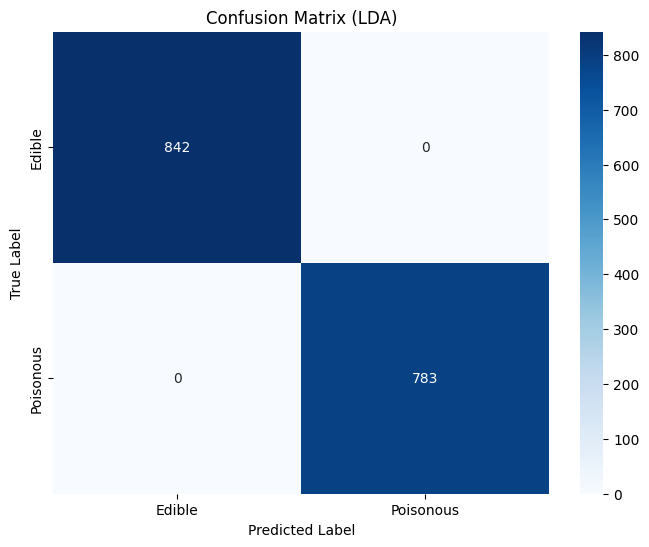

Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



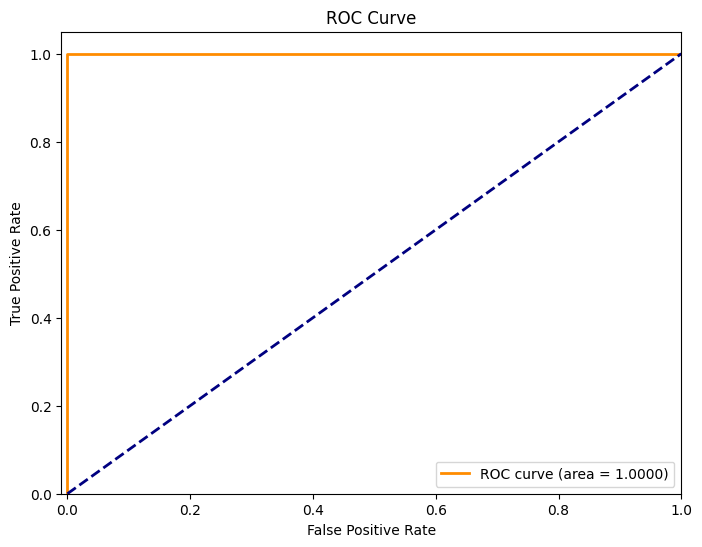

In [11]:
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test)
y_probabilities = best_model.predict_proba(X_test)[:, 1] 


con_matrix = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LDA)')
plt.show()


print("Report:")
print(classification_report(y_test, y_predicted, target_names=['Edible', 'Poisonous']))


fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:

coefs = pd.Series(best_model.coef_[0], index=X_train.columns)

print("Top features indicating Poisonous:")
print(coefs.sort_values(ascending=False).head(8))

print("Top features indicating 'Edible:")
print(coefs.sort_values().head(10))

Top features indicating Poisonous:
odor_b's'                        2019.328934
odor_b'f'                        2019.087428
odor_b'y'                        2018.901303
bruises%3F_b't'                  1137.283998
stalk-surface-below-ring_b'y'     796.950067
odor_b'c'                         671.461653
gill-spacing_b'w'                 193.228358
population_b'c'                   105.014963
dtype: float64
Top features indicating 'Edible:
stalk-root_b'r'               -3809.259449
stalk-root_b'c'               -3057.625795
veil-color_b'w'               -2631.532751
ring-number_b't'              -2335.211836
stalk-color-above-ring_b'o'   -2052.078175
stalk-color-below-ring_b'o'   -2052.078175
stalk-shape_b't'              -1815.498691
habitat_b'w'                  -1777.259297
ring-number_b'o'              -1593.119785
ring-type_b'l'                -1416.440714
dtype: float64


The dataset description provided by the author states that there are no simple rules for determining the edibility of a mushroom. However, if you had to be guided by something, examining the odor, the stalk might be worthwhile.

Indicators such as the F1 score and the area under the ROC curve (AUC) for the test set demonstrate that LDA performs perfectly as a binary classifier, contrary to my initial thoughts on the matter. The reason likely lies in the nature of the dataset itself: the edible and poisonous classes are so clearly separated that even simple models yield excellent results.That can be seen on the plot below.

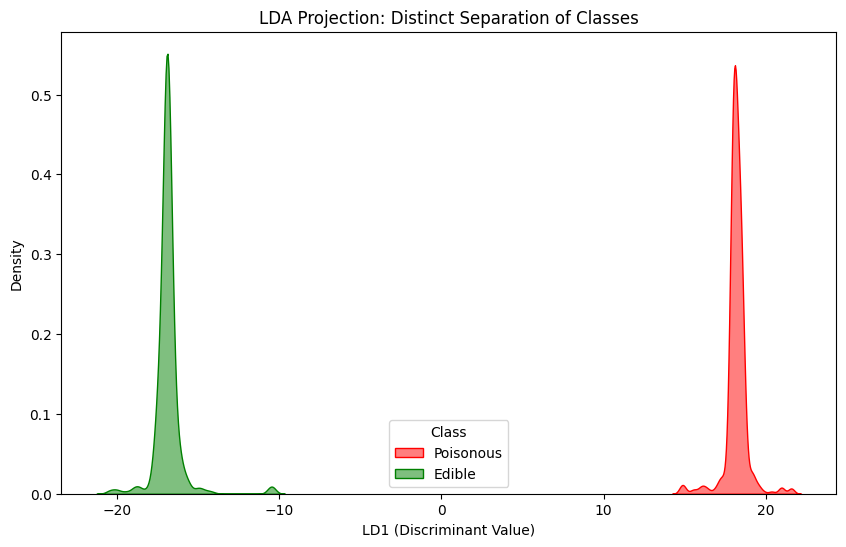

In [13]:

X_lda = best_model.transform(X_test)
plt.figure(figsize=(10, 6))

sns.kdeplot(x=X_lda.flatten(), hue=y_test, fill=True, palette=["green", "red"], alpha=0.5)
plt.title("LDA Projection: Distinct Separation of Classes")
plt.xlabel("LD1 (Discriminant Value)")
plt.legend(title='Class', labels=['Poisonous', 'Edible'])
plt.show()